## Data Wrangling

In [1]:
import pandas as pd

In [2]:
df_F = pd.read_csv('Train/train_FNC.csv')
df_S = pd.read_csv('Train/train_SBM.csv')
df_labels = pd.read_csv('Train/train_labels.csv')

In [3]:
df_F.shape

(86, 379)

In [4]:
df_S.shape

(86, 33)

In [5]:
#df = pd.merge(df_F, df_S, on='Id', how='outer')
df = df_S

In [6]:
df = df.set_index('Id')

In [8]:
df.head()

,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,...,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
Id,,,,,,,,,,,,,,,,,,,,,
120873,0.725065,-0.639254,0.353069,-0.981707,-1.419971,-0.441321,-0.264192,0.711579,0.641798,0.339658,...,-0.078220,-0.982331,1.070363,0.220316,0.776855,-2.022404,1.203256,1.083516,0.564201,-0.002006
135376,-1.328855,0.502970,0.013232,1.128496,-0.070738,0.398476,-0.466051,-0.435455,0.342847,-0.672254,...,0.989571,-0.057543,0.371701,-0.513081,-0.457550,1.476216,0.381052,0.163436,0.403782,-0.295125
139149,0.732268,-1.241554,0.654942,-0.289216,0.158316,0.029165,1.439242,-0.832816,1.285468,-2.132901,...,-0.257114,0.597229,1.220756,-0.059213,-0.435494,-0.092971,1.090910,-0.448562,-0.508497,0.350434
146791,-0.343917,-1.052519,-1.150521,0.765989,0.923129,0.674052,-0.492673,1.282388,-1.914583,-1.269851,...,-0.295110,0.829697,-0.450726,-0.791032,-1.115821,-0.022296,-0.245844,-0.705539,0.061344,0.448966
153870,-0.208685,-0.562697,-0.362164,1.025571,0.151690,-0.130410,-1.105922,0.502029,-0.097735,1.561833,...,1.342273,-0.978412,0.158492,0.889753,0.795368,0.738788,0.475415,2.340384,2.516038,-0.551440


In [9]:
from sklearn.preprocessing import MinMaxScaler
X = df.values
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
df = pd.DataFrame(X_scaled)

In [10]:
df.shape

(86, 32)

In [13]:
df_corr = pd.concat([df, df_labels], axis=1, join_axes=[df_labels.index])

In [16]:
df_corr = df_corr.corr()

In [ ]:
df_corrs

## Principal Component Analysis

In [10]:
import numpy as np
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
print(pca.explained_variance_ratio_)

[ 0.16794188  0.1223046 ]


In [13]:
X_pca = pca.transform(df)

In [14]:
df_pca = pd.DataFrame(X_pca)

In [15]:
df_pca = pd.concat([df_pca, df_labels], axis=1, join_axes=[df_labels.index])

In [16]:
df_pca = df_pca.set_index('Id')
df_pca.head()

,0,1,Class
Id,,,
120873,0.226218,0.439778,1
135376,-0.117079,-0.071348,0
139149,0.114953,-0.181085,0
146791,-0.746615,0.042771,0
153870,0.240492,0.232982,1


In [17]:
df_pca_pos = df_pca[df_pca['Class'] == 1]
df_pca_neg = df_pca[df_pca['Class'] == 0]

In [18]:
print(df_pca_pos.shape)
print(df_pca_neg.shape)

(40, 3)
(46, 3)


In [19]:
x_pos = df_pca_pos[0].values

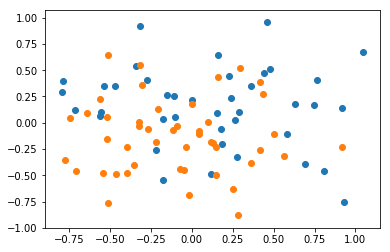

In [20]:
import matplotlib.pyplot as plt
plt.scatter(df_pca_pos[0].values, df_pca_pos[1].values, cmap='OrRd')
plt.scatter(df_pca_neg[0].values, df_pca_neg[1].values, cmap='RdPu')
plt.show()

## Kmeans Clustering

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=7).fit(df)

In [22]:
X_kmeans = kmeans.transform(df)

In [23]:
df_kmeans = pd.DataFrame(X_kmeans)

In [24]:
df_kmeans = pd.concat([df_kmeans, df_labels], axis=1, join_axes=[df_labels.index])

In [25]:
df_kmeans.head()

,0,1,Id,Class
0,0.921126,1.098318,120873,1
1,0.959846,0.804634,135376,0
2,1.138636,1.243881,139149,0
3,1.504715,1.065342,146791,0
4,1.065096,1.175614,153870,1


In [26]:
df_kmeans_pos = df_kmeans[df_kmeans['Class'] == 1]
df_kmeans_neg = df_kmeans[df_kmeans['Class'] == 0]

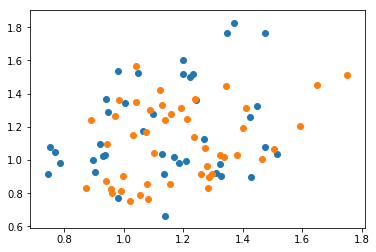

In [27]:
import matplotlib.pyplot as plt
plt.scatter(df_kmeans_pos[0].values, df_kmeans_pos[1].values, cmap='OrRd')
plt.scatter(df_kmeans_neg[0].values, df_kmeans_neg[1].values, cmap='RdPu')
plt.show()